Prisustvo odudarajućih podataka vrlo utiče na formu rešenja modela linearne regresije. Sledeći primer to ilustruje.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import metrics

In [3]:
np.random.seed(7)

In [4]:
# generisemo skup tacaka
N = 49
x = np.random.randn(N)
y = 3 + 2*x + np.random.randn(N)

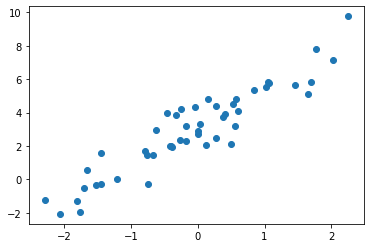

In [5]:
plt.scatter(x, y)

In [6]:
# odredjujemo model linearne regresije
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y)
beta0, beta1 = model.intercept_, model.coef_[0]

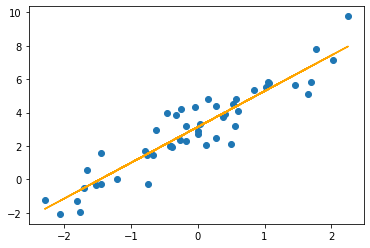

In [7]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange')
plt.show()

In [8]:
# biramo k proizvoljnih tacaka sa namerom da pokvarimo vrednosti u njima
k = 4
outlier_indexes = np.random.choice(np.arange(0, N), k)

In [9]:
y_with_outliers = y.copy()
y_with_outliers[outlier_indexes] *= 2

In [10]:
# odredjujemo model linearne regresije uz prisustvo odudarajucih podataka
model_with_outliers = linear_model.LinearRegression()
model_with_outliers.fit(x.reshape(-1, 1), y_with_outliers)
beta0_with_outliers, beta1_with_outliers = model_with_outliers.intercept_, model_with_outliers.coef_[0]

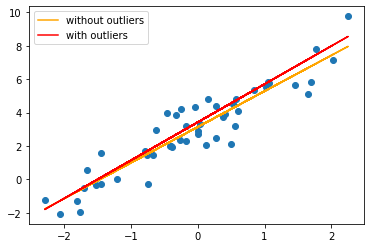

In [11]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange', label = 'without outliers')
plt.plot(x, beta0_with_outliers+beta1_with_outliers*x, color = 'red', label = 'with outliers')
plt.legend(loc = 'best')
plt.show()

Kao sto vidimo, prava je promenila svoj pravac.

Jedan od načina da se ispita postojanje odudarajućih podataka je iscrtavanje skupa vrednosti u formi grafika-kutije (eng. boxplot). Ovaj grafik koristi medijanu skupa vrednosti (Q2), donji (Q1) i gornji (Q3) kvartil i na osnovu njih izračunava dopustive donje i gornje vrednosti. Vrednosti koje prevazilaze ove opsege se mogu smatrati odudarajućim vrednostima. 

<img src='assets/boxplot.png'>

Zbog lakse vizualizacije podatke smeštamo u Pandas strukturu.

In [12]:
data = pd.DataFrame({'y': y_with_outliers})

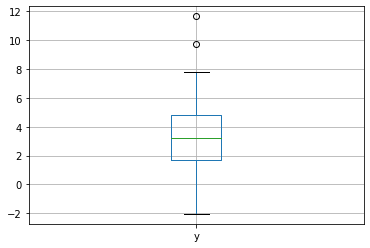

In [13]:
data.boxplot()

Pronalaženje odudarajućih vrednosti:

In [14]:
data_y = data['y'].sort_values().values

In [15]:
# medijana 
Q2_index = int(N/2)
Q2 = data_y[Q2_index]
print(Q2_index, Q2)

24 3.188772317273629


In [16]:
# donji kvartil
Q1_index = int(N/4)
Q1 = data_y[Q1_index]
print(Q1_index, Q1)

12 1.6747316783038404


In [17]:
# gornji kvartil
Q3_index = int(3*N/4)
Q3 = data_y[Q3_index]
print(Q3_index, Q3)

36 4.81275276421185


In [18]:
# interkvartilni opseg
IQR = Q3 - Q1 
IQR

3.1380210859080098

In [19]:
# dopustiva donja i gornja granica vrednosti promenljive
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(lower_limit, upper_limit)

-3.0322999505581745 9.519784393073865


In [20]:
outliers_below_lower_limit = data_y[data_y<lower_limit]

In [21]:
outliers_below_lower_limit

array([], dtype=float64)

In [22]:
outliers_above_upper_limit = data_y[data_y>upper_limit]

In [23]:
outliers_above_upper_limit

array([ 9.75513709, 11.66763937])

In [24]:
outliers = np.concatenate((outliers_below_lower_limit, outliers_above_upper_limit), axis = 0)

In [25]:
print('Outliers: ', outliers )

Outliers:  [ 9.75513709 11.66763937]


Podsetnik: 
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623